In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

2023-08-12 06:16:52.633536: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from keras.datasets import boston_housing

# 집값 데이터 불러와 변수에 할당
(train_data, train_labels),(test_data, test_labels) = boston_housing.load_data()

# 데이터셋 크기 확인
print(len(train_data))
print(len(test_data))

404
102


In [3]:
train_data.shape # 13개 피처, 404개 데이터

(404, 13)

## 데이터 전처리

In [4]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

In [5]:
print((train_data.shape[1], ))
print(len(train_data, ))

(13,)
404


In [6]:
# validation data 분리
from sklearn.model_selection import train_test_split

In [7]:
train_x, val_x, train_y, val_y = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

## 모델 구성 및 컴파일

In [8]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.

# 입력형태 정의
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_shape = (train_data.shape[1], )

# 레이어 쌓기
model = models.Sequential()
model.add(layers.Input(shape=input_shape))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


# 컴파일

model.compile(optimizer='adam',loss = 'mean_squared_error', metrics=['mean_squared_error', 'mae']) # mse(손실 제곱 함의 평균)으로 평가



# 모델 객체 생성한다
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               4200      
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 7210 (28.16 KB)
Trainable params: 7210 (28.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 모델학습

In [9]:
history = model.fit(train_x, train_y, validation_data=(val_x, val_y),epochs=40)

Epoch 1/40
11/11 [==============================] - 1s 37ms/step - loss: 610.0976 - mean_squared_error: 610.0976 - mae: 22.7659 - val_loss: 468.4189 - val_mean_squared_error: 468.4189 - val_mae: 20.4173
Epoch 2/40
11/11 [==============================] - 0s 5ms/step - loss: 610.0975 - mean_squared_error: 610.0975 - mae: 22.7659 - val_loss: 468.4188 - val_mean_squared_error: 468.4188 - val_mae: 20.4173
Epoch 3/40
11/11 [==============================] - 0s 5ms/step - loss: 610.0974 - mean_squared_error: 610.0974 - mae: 22.7659 - val_loss: 468.4188 - val_mean_squared_error: 468.4188 - val_mae: 20.4173
Epoch 4/40
11/11 [==============================] - 0s 5ms/step - loss: 610.0974 - mean_squared_error: 610.0974 - mae: 22.7659 - val_loss: 468.4188 - val_mean_squared_error: 468.4188 - val_mae: 20.4173
Epoch 5/40
11/11 [==============================] - 0s 5ms/step - loss: 610.0974 - mean_squared_error: 610.0974 - mae: 22.7659 - val_loss: 468.4188 - val_mean_squared_error: 468.4188 - val_ma

## 시각화

In [10]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'mae', 'val_loss', 'val_mean_squared_error', 'val_mae'])

/var/folders/96/sm2p62h1023c4ytkjcyhc9x40000gn/T/ipykernel_5928/2438909638.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


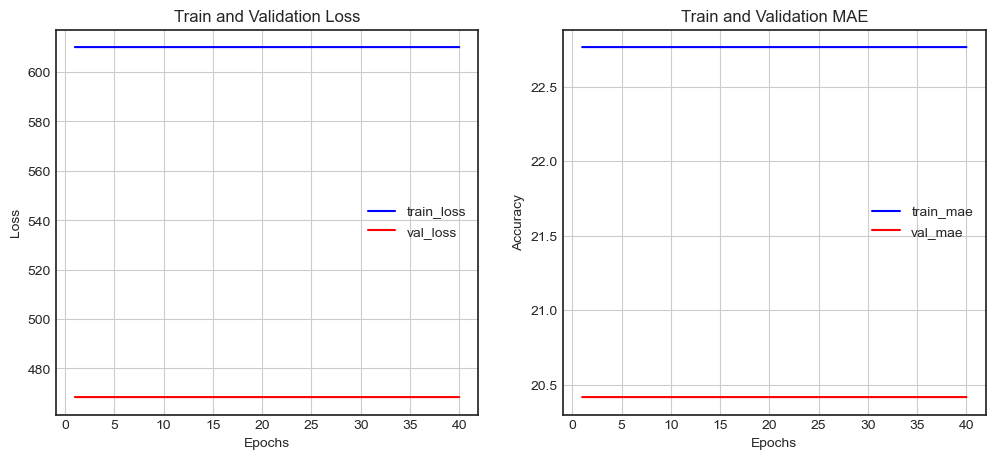

In [11]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [12]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 611.2521 - mean_squared_error: 611.2521 - mae: 22.9784


[611.2521362304688, 611.2521362304688, 22.978431701660156]

4/4 [==============================] - 0s 1ms/step


ValueError: x and y must be the same size

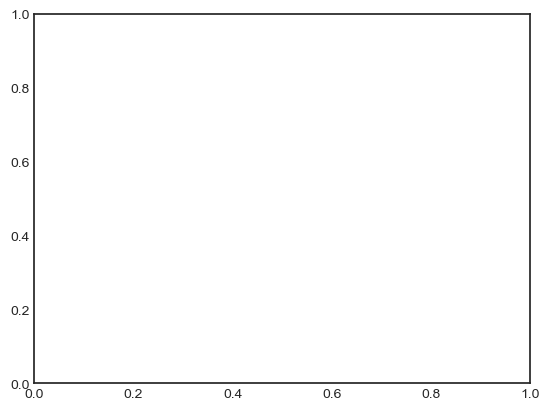

In [16]:
result = model.predict(x=test_data) # 테스트 데이터로 예측하기
plt.scatter(test_data, y=test_labels) # 전체 데이터 산점도
# plt.plot =(train_data, result) # 예측결과
# plt.show()